In [1]:
# Importing the pandas library and checking its version
import pandas as pd

# Get the pandas version
pandas_version = pd.__version__
pandas_version

'2.0.3'

In [2]:
# Load the dataset
file_path = 'housing.csv'
housing_data = pd.read_csv(file_path)

# Show the first few rows of the dataset for context
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


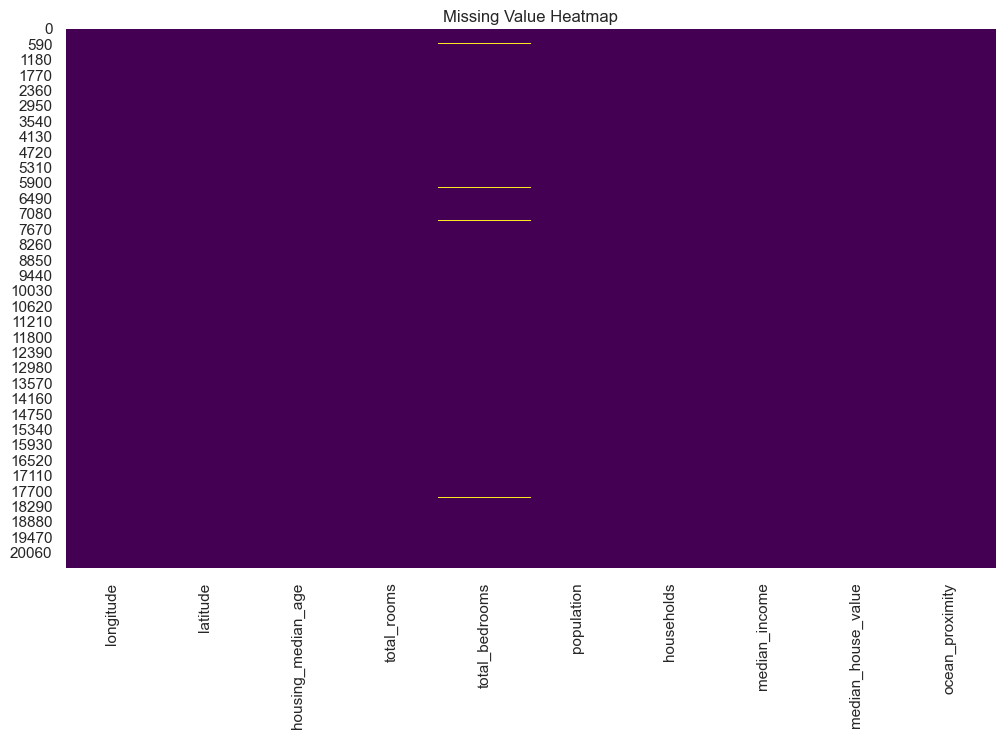

In [3]:
# Importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the visualizations
sns.set(style="whitegrid")

# 1. Missing Value Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(housing_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [4]:
# 1. How many columns are in the dataset?
num_columns = housing_data.shape[1]

# 2. Which columns in the dataset have missing values?
columns_with_missing_values = housing_data.columns[housing_data.isnull().any()].tolist()

# 3. How many unique values does the 'ocean_proximity' column have?
unique_ocean_proximity = housing_data['ocean_proximity'].nunique()

# 4. What's the average value of the 'median_house_value' for the houses located near the bay?
avg_median_house_value_near_bay = housing_data[housing_data['ocean_proximity'] == 'NEAR BAY']['median_house_value'].mean()

# 5. Calculate the average of 'total_bedrooms' column in the dataset.
avg_total_bedrooms = housing_data['total_bedrooms'].mean()

num_columns, columns_with_missing_values, unique_ocean_proximity, avg_median_house_value_near_bay, avg_total_bedrooms


(10, ['total_bedrooms'], 5, 259212.31179039303, 537.8705525375618)

In [5]:
# Filling the missing values in 'total_bedrooms' with the mean value
housing_data['total_bedrooms'].fillna(avg_total_bedrooms, inplace=True)

# Recalculating the average of 'total_bedrooms' after filling missing values
new_avg_total_bedrooms = housing_data['total_bedrooms'].mean()

# Rounding both old and new averages to 3 decimal places for comparison
avg_total_bedrooms_rounded = round(avg_total_bedrooms, 3)
new_avg_total_bedrooms_rounded = round(new_avg_total_bedrooms, 3)

# Checking if the average has changed
has_average_changed = avg_total_bedrooms_rounded != new_avg_total_bedrooms_rounded

avg_total_bedrooms_rounded, new_avg_total_bedrooms_rounded, has_average_changed


(537.871, 537.871, False)

In [6]:
# Selecting all the rows where 'ocean_proximity' is 'ISLAND'
island_data = housing_data[housing_data['ocean_proximity'] == 'ISLAND']

# Displaying the first few rows of the subset data for islands
island_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [7]:
# Importing NumPy for numerical operations
import numpy as np

# Selecting only the columns 'housing_median_age', 'total_rooms', 'total_bedrooms'
selected_columns = housing_data[['housing_median_age', 'total_rooms', 'total_bedrooms']]

# Converting the DataFrame to a NumPy array
X = selected_columns.to_numpy()

# Displaying the shape and first few rows of the NumPy array
X.shape, X[:5, :]


((20640, 3),
 array([[  41.,  880.,  129.],
        [  21., 7099., 1106.],
        [  52., 1467.,  190.],
        [  52., 1274.,  235.],
        [  52., 1627.,  280.]]))

In [8]:
# Compute matrix-matrix multiplication between the transpose of X and X
XTX = np.dot(X.T, X)

# Displaying the resulting matrix XTX
XTX


array([[2.01984850e+07, 1.35332892e+09, 2.83204712e+08],
       [1.35332892e+09, 2.41621366e+11, 4.67660348e+10],
       [2.83204712e+08, 4.67660348e+10, 9.59926544e+09]])

In [9]:
# Compute the inverse of XTX
XTX_inv = np.linalg.inv(XTX)

# Displaying the inverse matrix XTX_inv
XTX_inv


array([[ 8.47988169e-08,  1.62386103e-10, -3.29291640e-09],
       [ 1.62386103e-10,  7.28537219e-11, -3.59722129e-10],
       [-3.29291640e-09, -3.59722129e-10,  1.95383149e-09]])

In [10]:
# Create an array y with values [950, 1300, 800, 1000, 1300]
y = np.array([950, 1300, 800, 1000, 1300])

# Multiply the inverse of XTX with the transpose of X
XTX_inv_XT = np.dot(XTX_inv, X.T)

# Multiply the result by y to get w
w = np.dot(XTX_inv_XT, y)

# Extract the value of the last element of w
last_element_w = w[-1]

# Displaying the result w and the last element of w
w, last_element_w


ValueError: shapes (3,20640) and (5,) not aligned: 20640 (dim 1) != 5 (dim 0)

In [11]:
# Compute XTX and its inverse using only the first 5 rows of X
XTX_subset = np.dot(X[:5, :].T, X[:5, :])
XTX_inv_subset = np.linalg.inv(XTX_subset)

# Create the array y with values [950, 1300, 800, 1000, 1300]
y_subset = np.array([950, 1300, 800, 1000, 1300])

# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y
XTX_inv_XT_subset = np.dot(XTX_inv_subset, X[:5, :].T)
w_subset = np.dot(XTX_inv_XT_subset, y_subset)

# Find the value of the last element of w
last_element_w_subset = w_subset[-1]

# Displaying the result w and the last element of w
w_subset, last_element_w_subset

(array([16.46449939, -0.4502882 ,  3.75303243]), 3.7530324300399114)

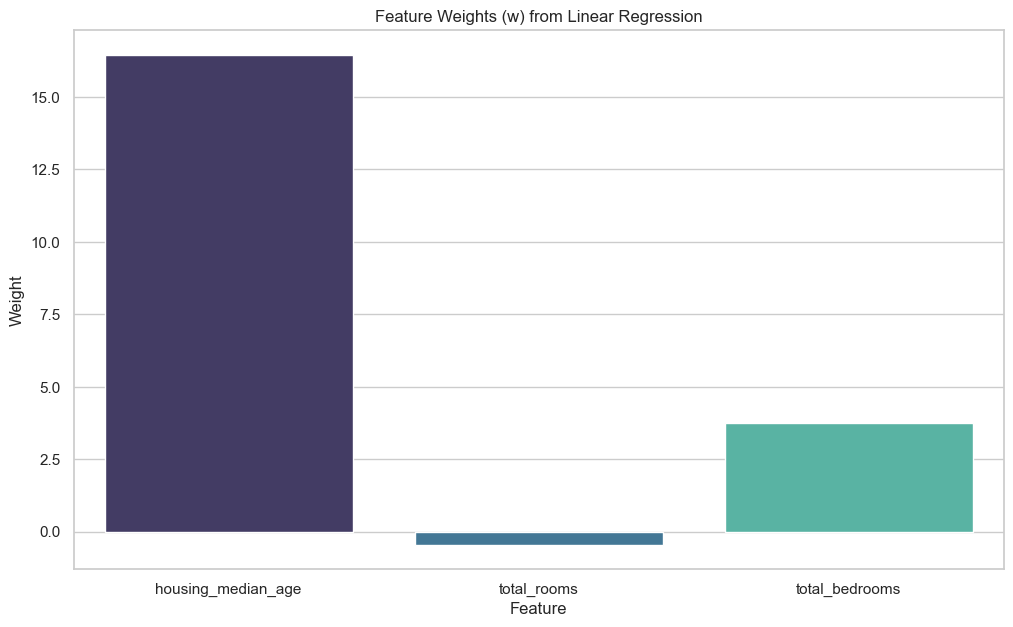

In [13]:
#Feature Weights (w)

# Create a DataFrame to store the feature names and their corresponding weights
feature_weights = pd.DataFrame({'Feature': ['housing_median_age', 'total_rooms', 'total_bedrooms'],
                                'Weight': w_subset})

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Weight', data=feature_weights, palette='mako')
plt.title('Feature Weights (w) from Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.show()


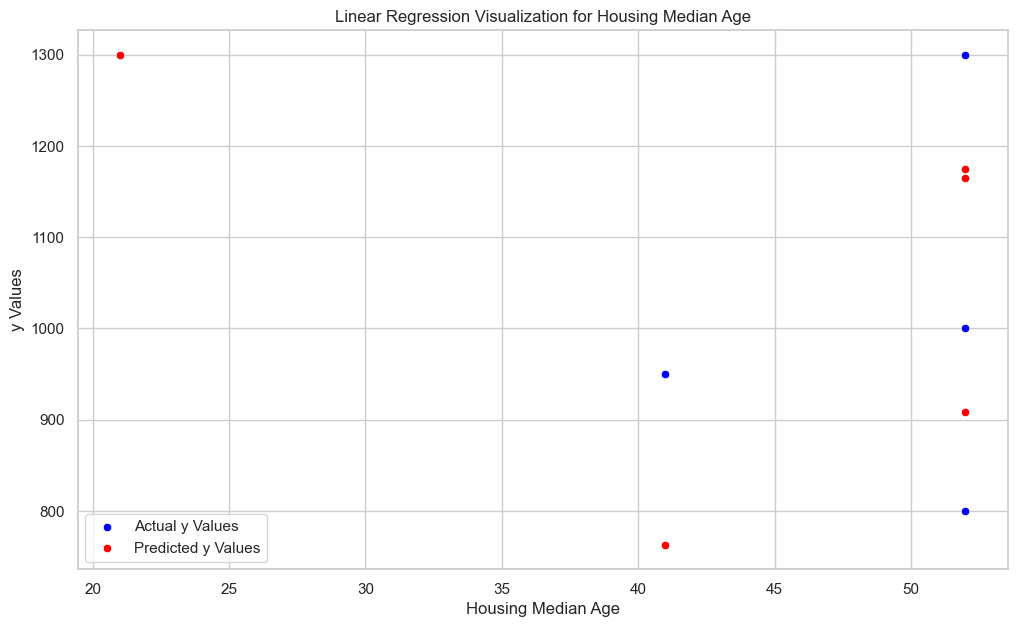

In [17]:
# Calculate the predicted values (y_hat) based on the first 5 rows of X and the calculated weights w_subset
# We're using the w_subset because it was calculated based on the first 5 rows of X and the original y array [950, 1300, 800, 1000, 1300]
y_hat_subset = np.dot(X[:5, :], w_subset)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'housing_median_age': X[:5, 0],  # First 5 rows of the 'housing_median_age' feature
    'y_actual': y_subset,            # Actual y values
    'y_predicted': y_hat_subset      # Predicted y values
})

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the actual y values
sns.scatterplot(x='housing_median_age', y='y_actual', data=plot_data, label='Actual y Values', color='blue')

# Plot the predicted y values
sns.scatterplot(x='housing_median_age', y='y_predicted', data=plot_data, label='Predicted y Values', color='red')

# Add labels and title
plt.xlabel('Housing Median Age')
plt.ylabel('y Values')
plt.title('Linear Regression Visualization for Housing Median Age')
plt.legend()

# Show the plot
plt.show()


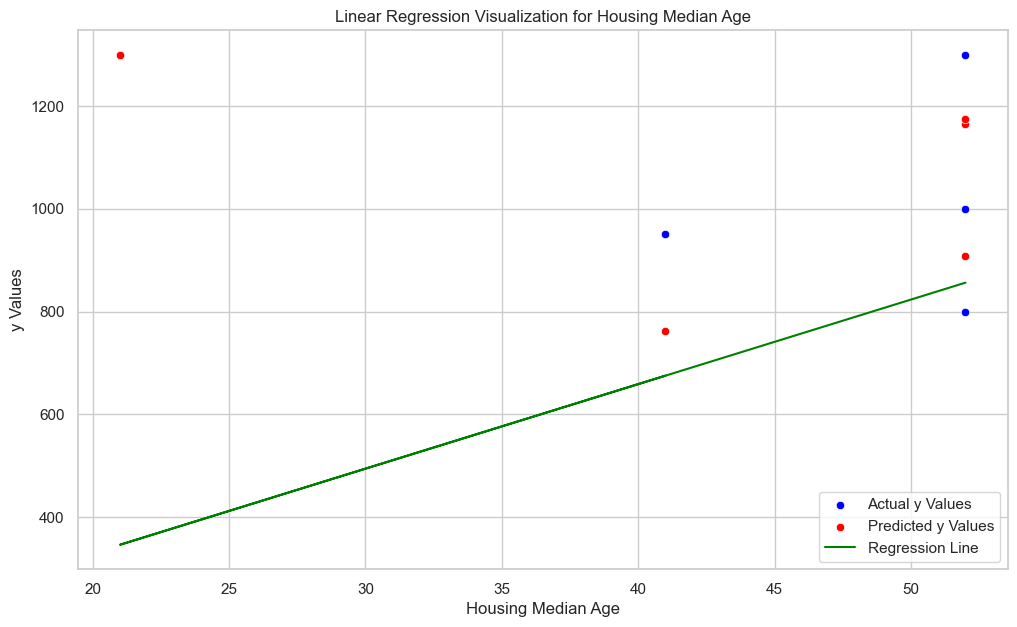

In [18]:
# Calculate the regression line based on the weight corresponding to 'housing_median_age'
# y = wx, where w is the weight for 'housing_median_age'
regression_line = plot_data['housing_median_age'] * w_subset[0]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the actual y values
sns.scatterplot(x='housing_median_age', y='y_actual', data=plot_data, label='Actual y Values', color='blue')

# Plot the predicted y values
sns.scatterplot(x='housing_median_age', y='y_predicted', data=plot_data, label='Predicted y Values', color='red')

# Plot the regression line
plt.plot(plot_data['housing_median_age'], regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Housing Median Age')
plt.ylabel('y Values')
plt.title('Linear Regression Visualization for Housing Median Age')
plt.legend()

# Show the plot
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(plot_data['y_actual'], plot_data['y_predicted'])

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(plot_data['y_actual'], plot_data['y_predicted'])

# 3. Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

# 4. Coefficient of Determination (R^2)
r2 = r2_score(plot_data['y_actual'], plot_data['y_predicted'])

mae, mse, rmse, r2

(117.16059215619467, 17924.75871589148, 133.88337729491096, 0.5473545778815283)